# Data Preprocessing

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Import Dataset**

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset = dataset.dropna()
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

**Splitting Dataset into traning and test set**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Applying Synthetic Minority Oversampling**

In [5]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Traning The Model on random forest

**Traning The Model**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
classifier_random = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier_random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

**Predicting Values**

In [7]:
y_pred_random = classifier_random.predict(X_test)

# Analysing Results

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred_random))
print('accuracy_score\n',accuracy_score(y_test, y_pred_random))
print("Classification Report:\n", classification_report(y_test, y_pred_random))
roc_auc = roc_auc_score(y_test, y_pred_random)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix
 [[29167     5]
 [    7    57]]
accuracy_score
 0.9995895471336708
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29172
         1.0       0.92      0.89      0.90        64

    accuracy                           1.00     29236
   macro avg       0.96      0.95      0.95     29236
weighted avg       1.00      1.00      1.00     29236

ROC-AUC Score: 0.9452268013848896


# Visualizing Results

**Feature Importance Plot**

<ipython-input-13-75819848c062>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=sorted_features, palette='viridis')


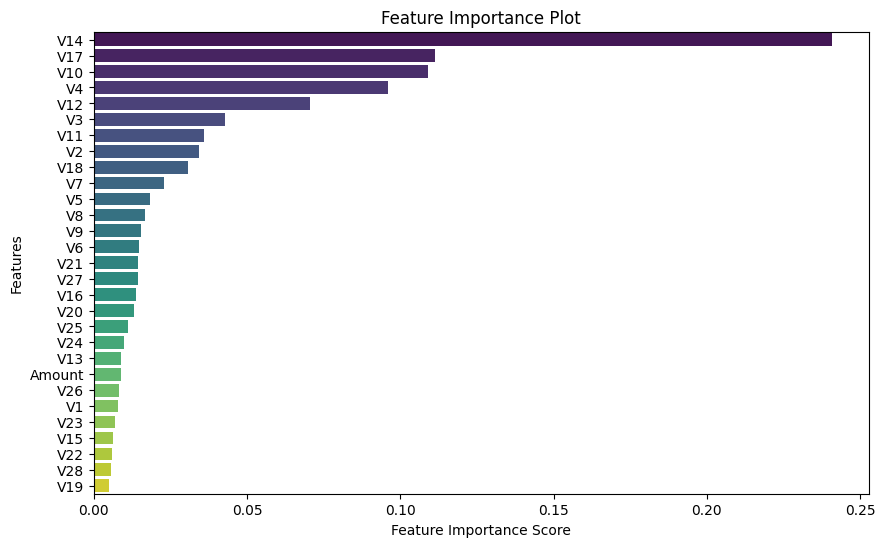

In [13]:
feature_importances = classifier_random.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = dataset.columns[1:-1][sorted_indices]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


**Diffrence between test set and predticted set**

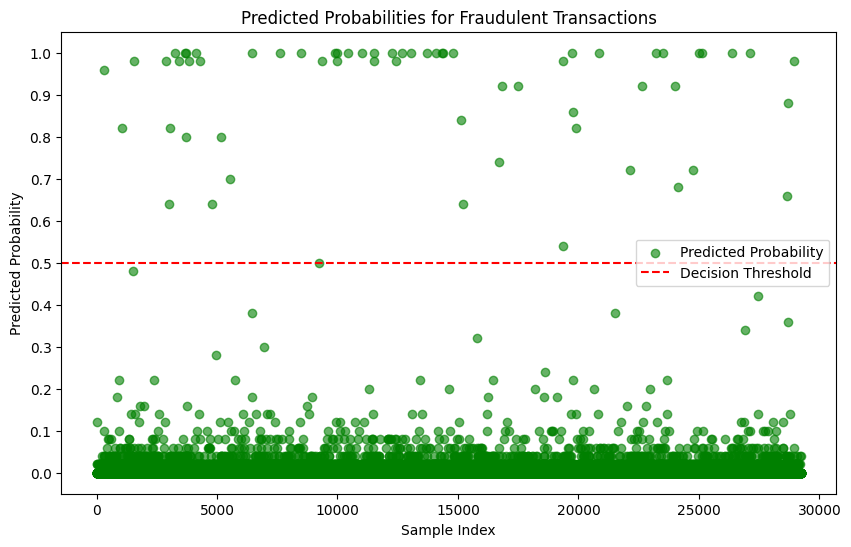

In [15]:
y_pred_probs = classifier_random.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_pred_probs, color='green', label='Predicted Probability', alpha=0.6)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Fraudulent Transactions')
plt.legend()
plt.show()
